In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
 
dataset = pd.read_csv('baseball_players.csv')
dataset.head()

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [2]:
dataset.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [3]:
dataset = dataset.dropna(axis =0)
dataset.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

Text(0.5, 1.0, 'Count of Position')

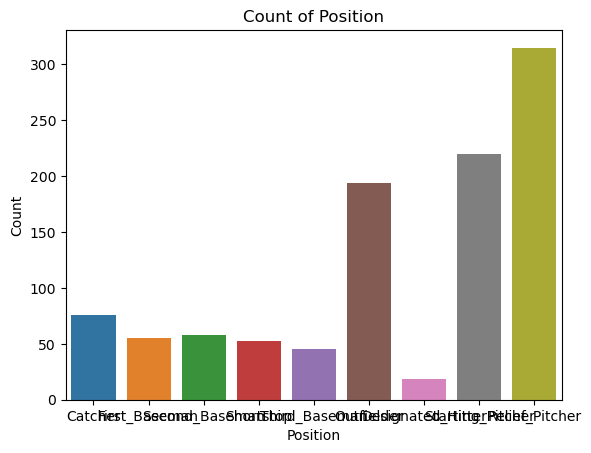

In [4]:
sns.countplot(data = dataset, x="Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Count of Position")

<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

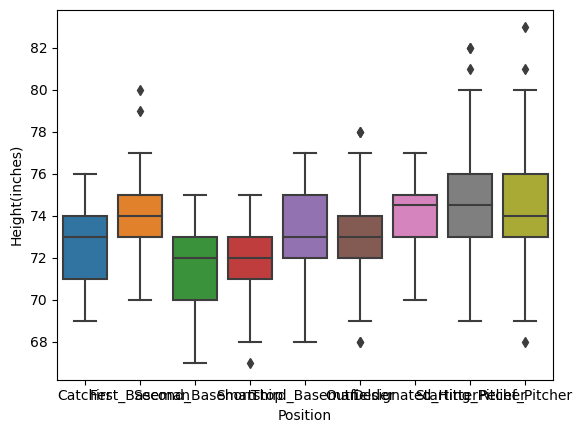

In [5]:
sns.boxplot(x='Position', y='Height(inches)',data=dataset)

<AxesSubplot:xlabel='Position', ylabel='Weight(pounds)'>

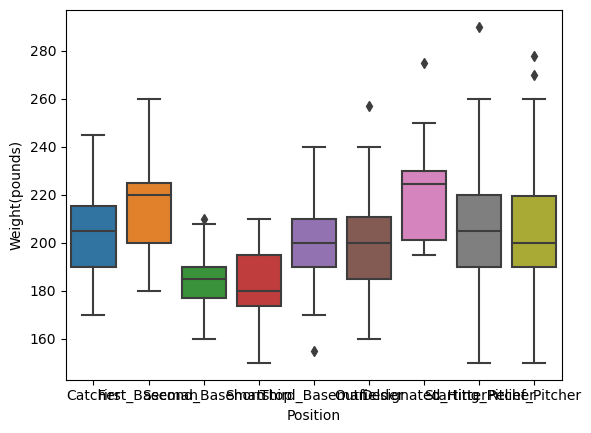

In [6]:
sns.boxplot(x='Position', y='Weight(pounds)',data=dataset)

<AxesSubplot:xlabel='Position', ylabel='Age'>

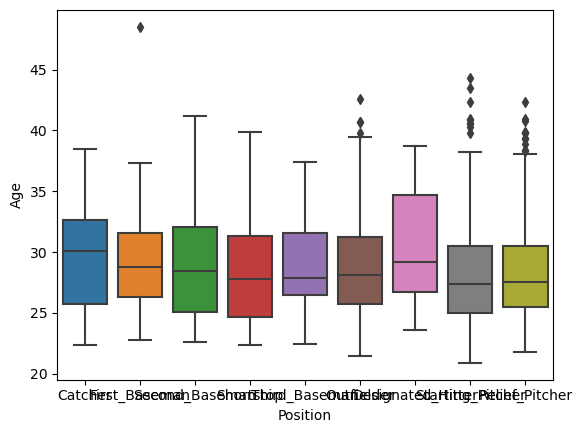

In [7]:
sns.boxplot(x='Position', y='Age',data=dataset)

In [8]:
#Frequency distribution of species"
Position_outcome = pd.crosstab(index=dataset["Position"],  # Make a crosstab
                              columns="count")      # Name the count column

Position_outcome

col_0,count
Position,
Catcher,76
Designated_Hitter,18
First_Baseman,55
Outfielder,194
Relief_Pitcher,315
Second_Baseman,58
Shortstop,52
Starting_Pitcher,220
Third_Baseman,45


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
dataset['Position']=le.fit_transform(dataset['Position'])
dataset['Position']=le.fit_transform(dataset['Position'])
dataset['Name']=le.fit_transform(dataset['Name'])
dataset['Team']=le.fit_transform(dataset['Team'])

dataset.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,74,180.0,22.99
1,793,3,0,74,215.0,34.69
2,816,3,0,72,210.0,30.78
3,628,3,2,72,210.0,35.43
4,199,3,2,73,188.0,35.71


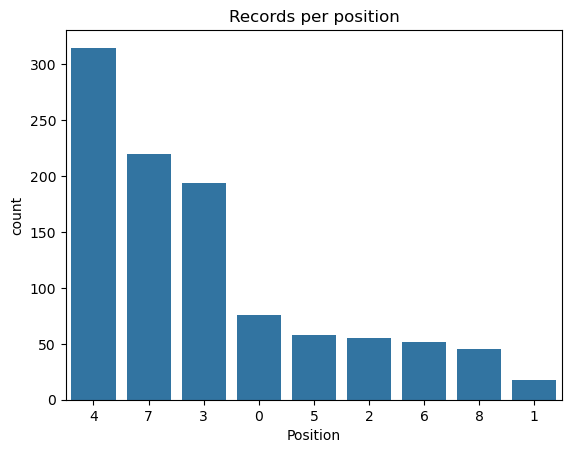

In [12]:
sns.countplot(x="Position",data = dataset,palette=[sns.color_palette()[0]],order=dataset.Position.value_counts().index)
plt.title("Records per position");

In [13]:
X=dataset.drop('Position',axis=1)
X.head()

,Name,Team,Height(inches),Weight(pounds),Age
0,12,3,74,180.0,22.99
1,793,3,74,215.0,34.69
2,816,3,72,210.0,30.78
3,628,3,72,210.0,35.43
4,199,3,73,188.0,35.71


In [14]:
dataset

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,74,180.0,22.99
1,793,3,0,74,215.0,34.69
2,816,3,0,72,210.0,30.78
3,628,3,2,72,210.0,35.43
4,199,3,2,73,188.0,35.71
...,...,...,...,...,...,...
1029,105,25,4,73,190.0,25.08
1030,996,25,4,74,180.0,25.73
1031,202,25,4,75,205.0,25.19
1032,823,25,4,75,190.0,31.01


In [15]:
y=dataset['Position']
y.value_counts()

4    315
7    220
3    194
0     76
5     58
2     55
6     52
8     45
1     18
Name: Position, dtype: int64

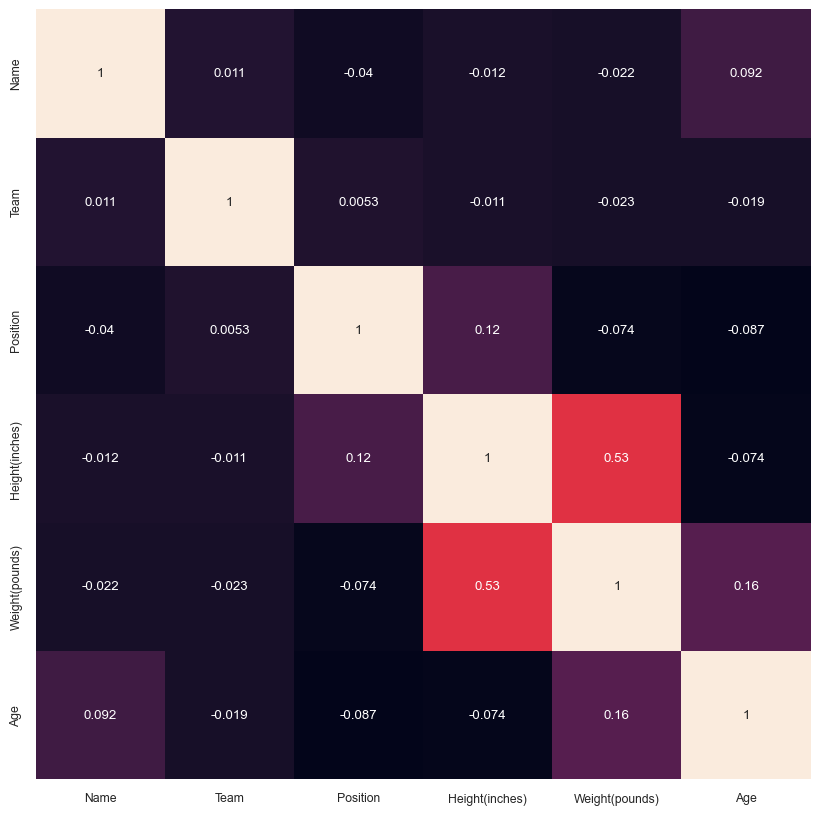

In [26]:
#상관 관계 행렬
dataset_corr=dataset.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(dataset_corr, annot=True, cbar=False)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.148555425292589


In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.017964232410336


In [16]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.2683697988647147


In [30]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.2782817138289917


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.29343629343629346
[[ 0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


In [20]:
#Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.28185328185328185
[[ 0  0  0  7 15  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  2 16  0  0  0  0]
 [ 0  0  0  6 34  0  0  0  0]
 [ 0  0  0  9 67  0  0  0  0]
 [ 0  0  0  5 13  0  0  0  0]
 [ 0  0  0  3 11  0  0  0  0]
 [ 0  0  0  9 45  0  0  0  0]
 [ 0  0  0  3 13  0  0  0  0]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.23552123552123552
[[ 0  0  0  5 15  0  0  1  1]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  1  3 11  1  0  2  0]
 [ 0  0  1  8 26  0  0  5  0]
 [ 0  0  2 21 45  0  2  5  1]
 [ 0  0  0 10  7  0  0  1  0]
 [ 0  0  0  9  5  0  0  0  0]
 [ 0  0  0 11 33  1  2  6  1]
 [ 0  0  0  4  8  0  0  3  1]]


In [23]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.23938223938223938
[[ 2  0  0  4  5  2  3  3  3]
 [ 0  0  0  0  1  0  0  0  0]
 [ 2  0  3  5  1  0  1  6  0]
 [ 4  2  1  9 13  3  1  6  1]
 [ 3  0  2 13 27  7  2 20  2]
 [ 0  0  1  5  3  3  0  5  1]
 [ 1  0  1  4  1  2  1  4  0]
 [ 4  0  2  7 22  0  1 16  2]
 [ 2  0  0  3  4  2  1  3  1]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24324324324324326
[[ 1  0  1  4 13  0  0  1  2]
 [ 0  0  0  0  0  0  0  1  0]
 [ 2  0  0  4  6  1  0  5  0]
 [ 1  0  1  8 15  3  1 11  0]
 [ 4  0  0  7 41  4  1 19  0]
 [ 1  0  0  3  6  3  1  4  0]
 [ 0  0  0  6  3  1  1  3  0]
 [ 1  0  2  7 33  1  0  9  1]
 [ 3  0  0  3  7  2  0  1  0]]


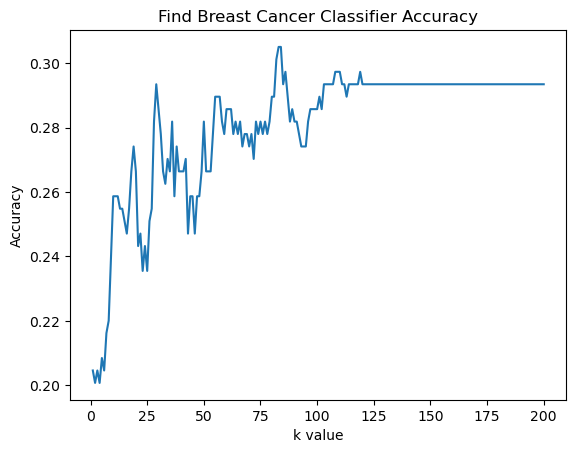

In [25]:
import matplotlib.pyplot as plt

k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Breast Cancer Classifier Accuracy")
plt.show()